### 행정구역정보(CSV)를 읽고, 분석하기
* read_csv() 함수로 csv 파일 읽기
* 행과열을 선택(Selection)
* 상관계수 구하기 
* 시각화

In [1]:
import pandas as pd

data = pd.read_csv('data/data_draw_korea.csv')
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [3]:
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [4]:
#인구수 컬럼의 평균, 중간, 최대, 최소
print('표준편차 ',data['인구수'].std())
print('평균 ',data['인구수'].mean())
print('중간 ',data['인구수'].median())
print('최대 ',data['인구수'].max())
print('최소 ',data['인구수'].min())

표준편차  207437.8370475227
평균  211089.77729257641
중간  140159.0
최대  1125461
최소  8392


In [5]:
#광역시도명(unique)
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [6]:
#광역시도 row count
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
울산광역시       5
광주광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [7]:
#경기도의 인구수 표준편차
data.loc[data['광역시도'] == '경기도','인구수'].std()

304548.39514203876

In [8]:
#서울특별시의 인구수 표준편차
data.loc[data['광역시도'] == '서울특별시','인구수'].std()

125231.24797500289

#### Data Selection
* loc, iloc 사용
* 슬라이싱 , 조건식, 특정행과 열을 여러개 선택

In [9]:
#6개의 행과 2개의 컬럼을 선택
data.loc[0:5,['행정구역','인구수']]

,행정구역,인구수
0,강릉시,202520
1,고성군,25589
2,동해시,86747
3,삼척시,63986
4,속초시,76733
5,양구군,20809


In [10]:
data.loc[0:5:2,['행정구역','인구수']]

,행정구역,인구수
0,강릉시,202520
2,동해시,86747
4,속초시,76733


In [11]:
#3,7,10행과 인구수부터 광역시도 컬럼까지
data.loc[[3,7,10],'인구수':'광역시도']

,인구수,shortName,x,y,면적,광역시도
3,63986,삼척,11,8,1185.80,강원도
7,34966,영월,10,8,1127.36,강원도
10,34242,정선,11,6,1220.67,강원도


In [28]:
#경상북도의 행정구역,인구수,면적 
data.loc[data['광역시도'] == '경상북도',['행정구역','인구수','면적']].head()

,행정구역,인구수,면적
seq,,,
67,경산시,251220,411.58
68,경주시,242618,1323.85
69,고령군,31189,383.70
70,구미시,396685,616.10
71,군위군,20596,614.15


In [29]:
#iloc
data.iloc[0:5,0:4]

,인구수,shortName,x,y
seq,,,,
0,202520,강릉,11,4
1,25589,고성(강원),9,0
2,86747,동해,11,5
3,63986,삼척,11,8
4,76733,속초,9,1


In [18]:
#컬럼명 변경
print(data.columns)
data = data.rename(columns={'Unnamed: 0':'seq'})
data.head(2)

Index(['seq', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')


,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군


In [19]:
#seq 컬럼을 index로 변환하기
data = data.set_index('seq')
data.head(2)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


In [27]:
#인구수가 전국평균보다 작은 행정구역은?
pop_mean_value = data['인구수'].mean()
print(pop_mean_value)

pop_mean_lt = data.loc[data['인구수'] < pop_mean_value].sort_values(by='인구수',ascending=False).reset_index(drop=True)
pop_mean_lt.head(3)

211089.77729257641


,인구수,shortName,x,y,면적,광역시도,행정구역
0,208603,서울용산,6,5,21.87,서울특별시,용산구
1,203232,울산울주,11,15,754.93,울산광역시,울주군
2,202520,강릉,11,4,1040.07,강원도,강릉시


In [33]:
#index를 1부터 시작하도록 변경하기
import numpy as np
print(pop_mean_lt.index)
pop_mean_lt.index = np.arange(1, len(pop_mean_lt)+1)
pop_mean_lt.head(2)

RangeIndex(start=0, stop=141, step=1)


,인구수,shortName,x,y,면적,광역시도,행정구역
1,208603,서울용산,6,5,21.87,서울특별시,용산구
2,203232,울산울주,11,15,754.93,울산광역시,울주군


In [35]:
#excel file로 저장하기
pop_mean_lt.to_excel('data/평균인구수미만지역.xlsx', sheet_name='평균인구수미만지역')

#### 상관계수
* 인구수와 면적이 관련성이 있는지 확인하기
* 상관계수는 -1 ~ 1 사이의 값이며, 0에 가까울수록 관련성이 낮고, 1에 가까울수록 관련성이 높다. 
* corr() 함수 사용

In [37]:
#전체 행정구역의 인구수와 면적의 상관계수
data['인구수'].corr(data['면적'])

-0.3460351605045768

In [40]:
#서울특별시 행정구역의 인구수와 면적의 상관계수
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['인구수'].corr(seoul_df['면적'])

0.6644268188909777

#### GroupBy 
* ~별에 해당하는 컬럼명이나 컬럼값을 함수의 인자로 전달한다.
* Series 객체의 groupby() 함수는 컬럼값을 인자로 전달한다.
* DataFrame 객체의 groupby() 함수는 컬럼명을 인자로 전달한다.

In [45]:
#Series 객체 : 광역시도별 인구수의 합계
#SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [49]:
#DataFrame 객체 : 광역시도별 인구수의 합계
#DataFrameGroupBy object
data.groupby('광역시도').sum().head()

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280


In [52]:
data.groupby('광역시도')['인구수'].sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [55]:
#광역시도별,행정구역별 인구수의 합계
groupby_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
groupby_df.to_excel('data/광역시도별행정구역별인구수합계.xlsx',sheet_name='인구수')

In [60]:
import numpy as np

def std(x):
    return np.std(x)

In [63]:
std([100,30,0])

41.899350299921785

In [66]:
#광역시도별 인구수의 max, mean, std 집계함수의 한번에 조회하기
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean',std]).sort_values(by='std', ascending=False)

In [73]:
#inplace=False이면 원본객체를 변경하지 않고, 출력만 해준다. 
group_agg_df.reset_index(level='광역시도', inplace=False)

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,299596.058671
1,경상남도,1010040,174693.722222,238871.227298
2,충청북도,790216,134974.545455,213061.090252
3,인천광역시,527153,276657.500000,189123.427397
4,대구광역시,584517,297306.250000,163113.245613
5,전라북도,630708,124217.714286,162204.085760
6,제주특별자치도,430504,287936.500000,142567.500000
7,충청남도,584912,129741.933333,136339.807302
8,서울특별시,615487,375792.280000,122701.062956
9,광주광역시,439683,287641.800000,122605.112711


In [75]:
#inplace=True이면 원본객체를 변경하고, 출력은 하지 않는다
group_agg_df.reset_index(level='광역시도', inplace=True)

In [77]:
group_agg_df

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,299596.058671
1,경상남도,1010040,174693.722222,238871.227298
2,충청북도,790216,134974.545455,213061.090252
3,인천광역시,527153,276657.500000,189123.427397
4,대구광역시,584517,297306.250000,163113.245613
5,전라북도,630708,124217.714286,162204.085760
6,제주특별자치도,430504,287936.500000,142567.500000
7,충청남도,584912,129741.933333,136339.807302
8,서울특별시,615487,375792.280000,122701.062956
9,광주광역시,439683,287641.800000,122605.112711


In [79]:
#행과 열을 바꾸고 싶다면 T속성이나 transpose() 함수를 사용하면 된다. 
group_agg_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,인천광역시,대구광역시,전라북도,제주특별자치도,충청남도,서울특별시,광주광역시,경상북도,부산광역시,대전광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,527153,584517,630708,430504,584912,615487,439683,488395,397134,475094,313851,263166,327270,191233
mean,378845.483871,174693.722222,134974.545455,276657.5,297306.25,124217.714286,287936.5,129741.933333,375792.28,287641.8,109085.391304,207724.4375,293535.4,79413.222222,77298.318182,221117.0,191233.0
std,299596.058671,238871.227298,213061.090252,189123.427397,163113.245613,162204.08576,142567.5,136339.807302,122701.062956,122605.112711,122208.147443,102872.28722,100044.876102,84856.271716,72702.375033,57389.388183,0.0


In [81]:
group_agg_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,인천광역시,대구광역시,전라북도,제주특별자치도,충청남도,서울특별시,광주광역시,경상북도,부산광역시,대전광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,527153,584517,630708,430504,584912,615487,439683,488395,397134,475094,313851,263166,327270,191233
mean,378845.483871,174693.722222,134974.545455,276657.5,297306.25,124217.714286,287936.5,129741.933333,375792.28,287641.8,109085.391304,207724.4375,293535.4,79413.222222,77298.318182,221117.0,191233.0
std,299596.058671,238871.227298,213061.090252,189123.427397,163113.245613,162204.08576,142567.5,136339.807302,122701.062956,122605.112711,122208.147443,102872.28722,100044.876102,84856.271716,72702.375033,57389.388183,0.0


### 시각화
* %matplotlib inline 설정이 필요함
* plot(그래프)이 출력되려면 show() 함수를 호출해야 하지만 jupyter 에서는 설정을 하면 show() 호출하지 않아도 됨
* 한글폰트 설정
* plot에 대한 설정은 matplotlib의 함수를 사용하고, plot을 그려주는 기능은 seaborn의 함수를 사용함

In [83]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [86]:
#폰트이름, 폰트파일 이름 출력
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Ma' in f.name]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Maiandra GD', 'C:\\windows\\Fonts\\MAIAN.TTF'),
 ('Magneto', 'C:\\Windows\\Fonts\\MAGNETOB.TTF'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunbd.ttf'),
 ('Magneto', 'C:\\windows\\Fonts\\MAGNETOB.TTF'),
 ('Matura MT Script Capitals', 'C:\\windows\\Fonts\\MATURASC.TTF'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunsl.ttf'),
 ('Marlett', 'C:\\windows\\Fonts\\marlett.ttf'),
 ('Matura MT Script Capitals', 'C:\\Windows\\Fonts\\MATURASC.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgun.ttf'),
 ('Maiandra GD', 'C:\\Windows\\Fonts\\MAIAN.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Magic R', 'C:\\Windows\\Fonts\\HMKMMAG.TTF'),
 ('Magic R', 'C:\\windows\\Fonts\\HMKMMAG.TTF')]

In [88]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()

#rc는 run command
matplotlib.rc('font', family='Malgun Gothic')

#### Figure, Axes, Axis
* Figure는 Plot이 그려지는 도화지
* Axes는 Figure를 분할해서 Plot이 그려지는 공간
* Figure에 Axes를 여러개 생성해서 Figure를 분할해서 Plot을 그릴 수 있다. 
* Seaborn에서 제공하는 막대그래프를 그릴 수 있는 barplot() 함수를 사용

Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


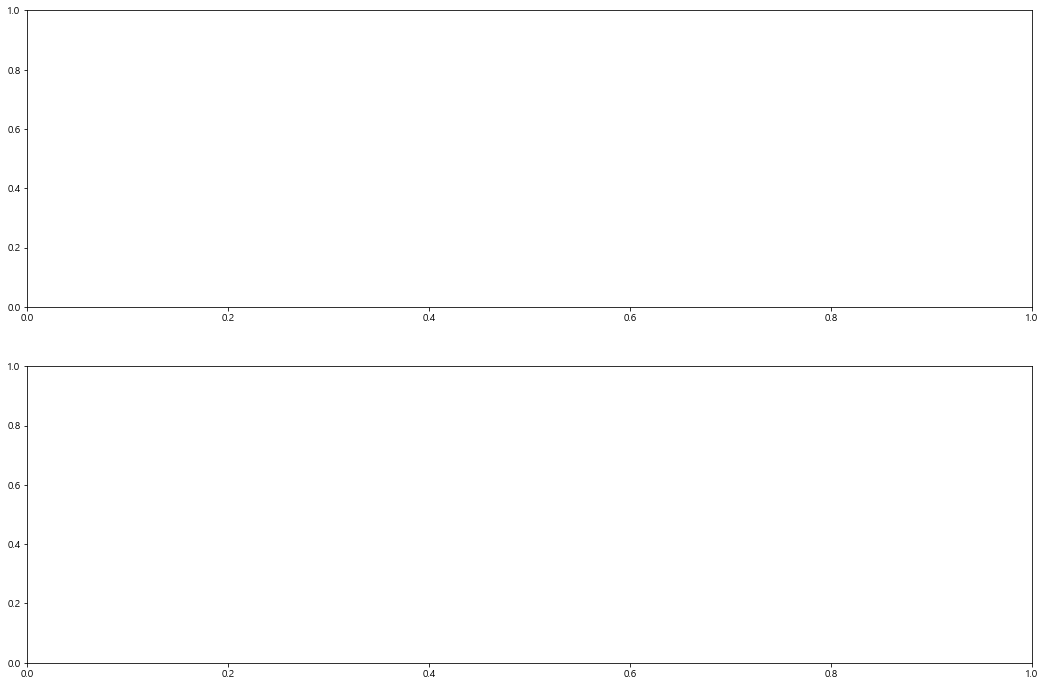

In [91]:
figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)